In [58]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

from collections import Counter

sns.set(rc={'figure.figsize': (15.7, 13.27)})
rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

In [3]:
ogDatas.replace('-', 0, inplace=True)
uids = ogDatas.columns

In [59]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]
# 아파트1-104-1206
searchKeyword = '아파트4-103-606'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


4 계절 나누기
---

In [60]:
SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

SEASONSARR = ['봄','여름','가을','겨울']

'''
 0 : 봄
 1 : 여름
 2 : 가을
 3 : 겨울
'''

datas = [
    tsDatas[(tsDatas['month'].isin(SEASONS[season]))].copy()
    for season in ["봄", "여름", "가을", "겨울"]
]

아파트1-104-1206 Start
아파트1-104-303 Start
아파트1-104-1307 Start
아파트1-104-1208 Start
아파트1-104-408 Start
아파트1-104-203 Start
아파트1-103-1402 Start
아파트1-103-402 Start
아파트1-103-1201 Start
아파트1-103-801 Start
아파트1-103-502 Start
아파트1-103-1602 Start
아파트1-103-301 Start
아파트1-103-1502 Start
아파트1-103-202 Start
아파트1-102-903 Start
아파트1-102-603 Start
아파트1-102-203 Start
아파트1-102-704 Start
아파트1-102-703 Start
아파트1-102-403 Start
아파트1-102-303 Start
아파트1-101-604 Start
아파트1-101-1602 Start
아파트1-101-1002 Start
아파트1-101-1202 Start
아파트1-101-1604 Start
아파트1-101-402 Start
아파트1-101-303 Start
아파트1-101-502 Start
아파트1-101-1403 Start
아파트1-101-904 Start
아파트1-101-1502 Start
아파트1-101-1102 Start
아파트1-101-901 Start
아파트1-101-704 Start
아파트1-101-504 Start
아파트1-102-104 Start
아파트1-102-301 Start
아파트1-102-1501 Start
아파트1-102-1602 Start
아파트1-102-1002 Start
아파트1-102-401 Start
아파트1-102-802 Start
아파트1-102-801 Start
아파트1-103-505 Start
아파트1-103-1805 Start
아파트1-103-1306 Start
아파트1-103-1806 Start
아파트1-103-803 Start
아파트1-103-1006 Start
아파트1-103-1

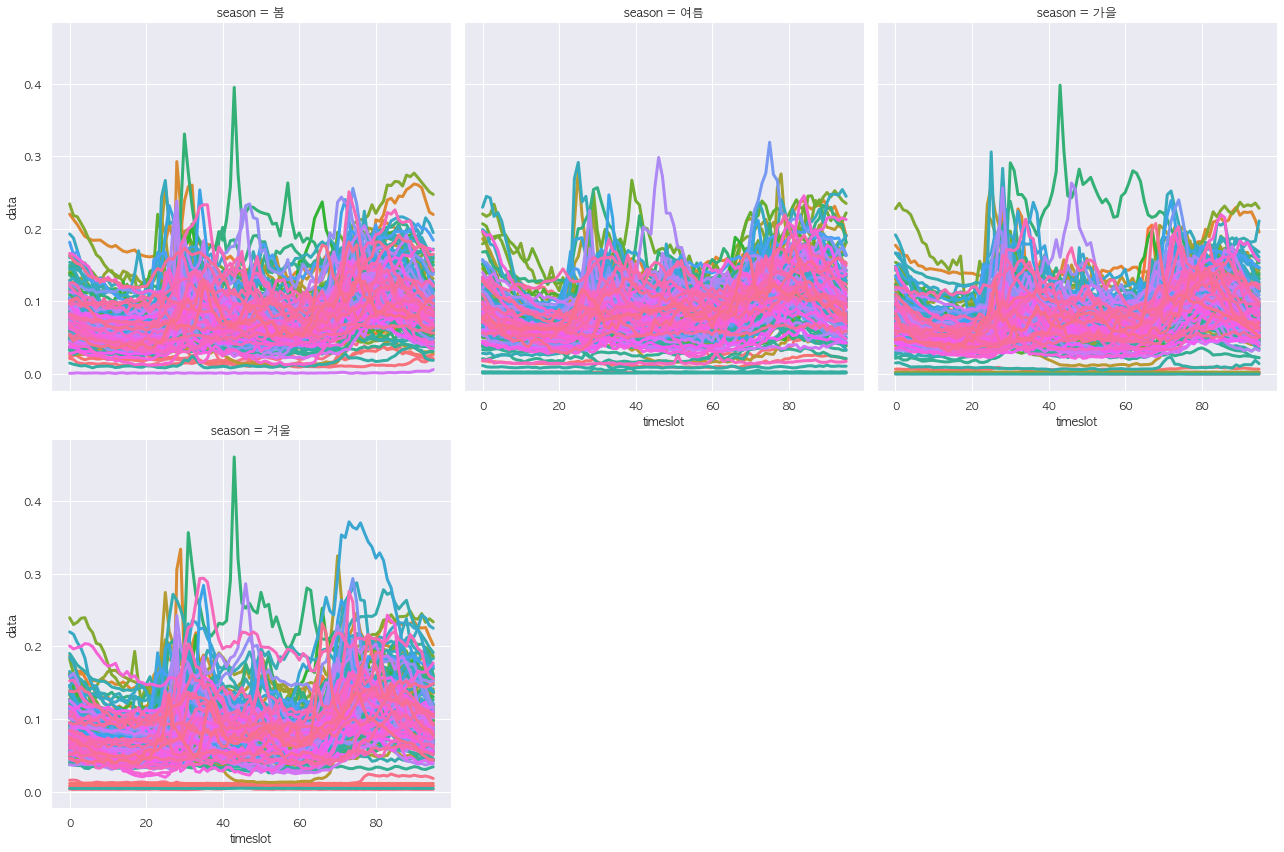

In [61]:
clusters = pd.DataFrame(columns=['uid', 'timeslot', 'season', 'data'])

count = 0;
max_count = 150;

for uid in uids:
    if count >= max_count:
        break;
    startDate = datetime(2018,5,1)
    endDate = datetime(2019,5,1)
    def datetime_range(start, end, delta):
        current = start
        while current < end:
            yield current
            current += delta
    dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                       datetime_range(startDate, endDate, timedelta(days = 1))]
    # 아파트1-104-1206
    print(f'{uid} Start')
    searchKeyword_2 = uid
    tsDatasObj = {}
    startIdx = 0;
    endIdx = 96;
    for date in dateIndexArr:
        tsDatasObj[date] = ogDatas[searchKeyword_2][startIdx:endIdx].values.tolist()
        startIdx = endIdx
        endIdx = endIdx + 96

    tsDatas = pd.DataFrame(tsDatasObj)
    tsDatas = tsDatas.T
    tsDatas = tsDatas.reset_index()
    tsDatas.rename(columns={'index':'date'}, inplace=True)
    tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
    tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
    tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
    tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
    tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

    SEASONS = {
        "봄" : ["03", "04", "05"],
        "여름" : ["06", "07", "08"],
        "가을" : ["09", "10", "11"],
        "겨울" : ["12", "01", "02"]
    }

    SEASONSARR = ['봄','여름','가을','겨울']

    '''
     0 : 봄
     1 : 여름
     2 : 가을
     3 : 겨울
    '''

    datas = [
        tsDatas[(tsDatas['month'].isin(SEASONS[season]))].copy()
        for season in ["봄", "여름", "가을", "겨울"]
    ]

    for i in range(0,4):
        dpp = datas[i][datas[i].columns.difference(['date', 'year', 'month', 'day'])].copy()
        dpp = dpp

        # Scaler 선택
        # STD, MIN, MAX, ROBUST, NORM
        selScaler = "ROBUST"

        scaler = StandardScaler()
        if selScaler == "STD":
            scaler = StandardScaler()
        elif selScaler == "MIN":
            scaler = MinMaxScaler()
        elif selScaler == "MAX":
            scaler = MaxAbsScaler()
        elif selScaler == "ROBUST":
            scaler = RobustScaler()
        elif selScaler == "NORM":
            scaler = Normalizer()

        dpp = pd.DataFrame(scaler.fit_transform(dpp))

        dpp.index = datas[i]['date']
        dpp

        pca = PCA(n_components=2)

        pca.fit(dpp)
        dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

        dr.index = datas[i]['date']
        dr

        '''
        def elbow(X):
            sse = []
            for i in range(1, 11):
                km = KMeans(n_clusters=i, init='k-means++', random_state=0)
                km.fit(X)
                sse.append(km.inertia_)

            plt.plot(range(1, 11), sse, marker = 'o')
            plt.show()

        elbow(dr)
        '''

        K = 3

        points = dr.values
        kmeans = KMeans(n_clusters=K).fit(points)
        centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

        clusterNum = [i for i in range(K)]
        centers['cluster'] = [i for i in range(len(centers))]
        centers['type'] = [f'cluster' for dt in clusterNum]
        centers

        kmeans.labels_

        clustering = dr.copy()
        clustering['cluster'] = kmeans.labels_
        clustering['type'] = ['data' for i in range(len(clustering['x']))]

        result = pd.concat([clustering, centers], axis = 0)

        result

        '''
        sns.scatterplot(x='x', y="y", 
                        hue="cluster", 
                        style="type",
                        palette="muted",
                        s=400,
                        data=result)
        '''
        tsCheck = datas[i][datas[i].columns.difference(['year', 'month', 'day'])].copy()
        tsCheck.reset_index(inplace=True)
        del tsCheck['index']
        tsCheck = tsCheck.set_index('date')
        tsCheck['cluster'] = clustering['cluster']
        tsCheck.reset_index(inplace=True)
        tsCheck.set_index(['cluster', 'date'], inplace=True)
        tsCheck = tsCheck.T
        tsCheck
        '''
        sns.lineplot(data=tsCheck)
        '''

        processingData = [];
        for d in tsCheck:
            for idx,t in enumerate(tsCheck[d]):
                processingData.append({
                    "date": d[1],
                    "timeslot": idx,
                    "cluster": f"cluster-{d[0]}",
                    "data": t
                })
        processingData = pd.DataFrame(processingData)
        processingData

        '''
        sns.lineplot(data=processingData,
                    x="timeslot",
                    y="data",
                    units="date",
                    hue="cluster",
                    estimator=None,
                    lw=0.5)
        '''

        best = pd.DataFrame(processingData.groupby('cluster').size().sort_values(ascending=False)).reset_index()['cluster'][0]
#        print(f'best is {best}')
        cluster = processingData[processingData['cluster'] == best].groupby('timeslot').mean().reset_index()
        cluster['uid'] = searchKeyword_2
        cluster['season'] = SEASONSARR[i]
        cluster

        clusters = pd.concat([clusters, cluster], axis = 0)
        
    count+=1
        
clusterMap = sns.FacetGrid(clusters, col="season",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "uid", estimator=None, lw=3)

In [62]:
datas[0][datas[0].columns.difference(['year', 'month', 'day'])].copy()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,date
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2018-05-01
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2018-05-02
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2018-05-03
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2018-05-04
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2018-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.061,0.083,0.082,0.064,0.071,0.067,0.060,0.045,0.031,0.040,0.041,0.035,0.029,0.042,0.044,0.051,0.032,0.028,0.040,0.041,0.042,0.027,0.036,0.061,0.042,0.054,0.053,0.123,0.081,0.053,0.092,0.268,0.273,0.195,0.103,0.123,0.109,0.097,0.076,0.079,0.075,0.080,0.074,0.065,0.058,0.072,0.074,0.067,0.061,0.079,0.122,0.116,0.096,0.064,0.066,0.087,0.067,0.033,0.036,0.047,0.080,0.084,0.0

<AxesSubplot:xlabel='timeslot', ylabel='data'>

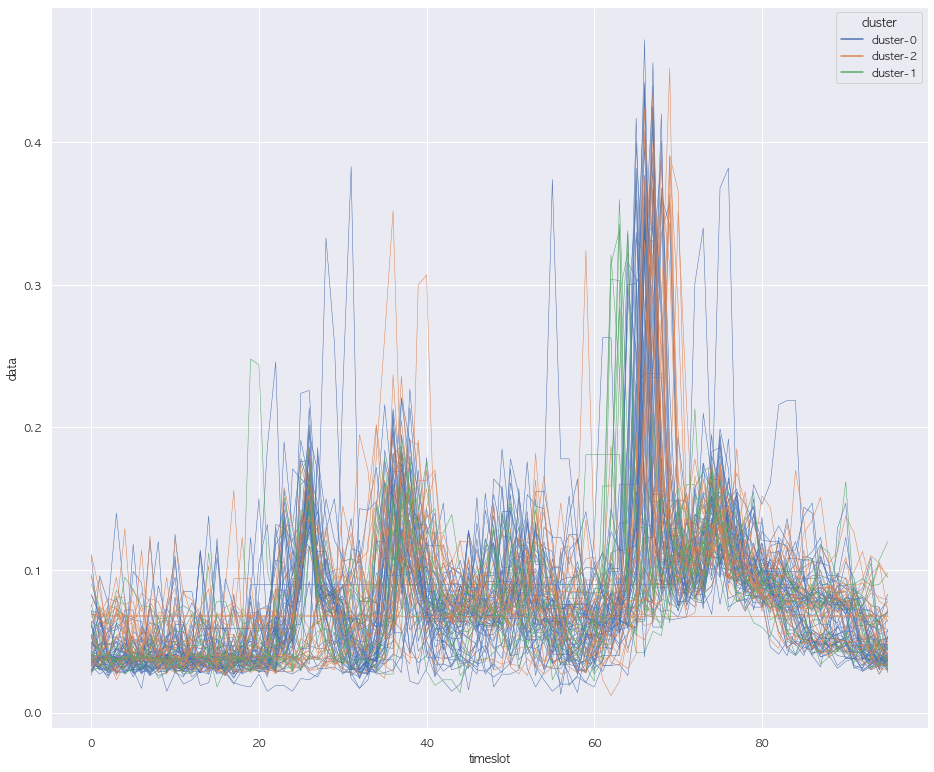

In [63]:
'''
Data Structure
{
    date: datetime,
    timeslot: integer,
    cluster: string,
    data: float
}
'''
processingData = [];
for d in tsCheck:
    for idx,t in enumerate(tsCheck[d]):
        processingData.append({
            "date": d[1],
            "timeslot": idx,
            "cluster": f"cluster-{d[0]}",
            "data": t
        })
processingData = pd.DataFrame(processingData)
processingData

sns.lineplot(data=processingData,
            x="timeslot",
            y="data",
            units="date",
            hue="cluster",
            estimator=None,
            lw=0.5)

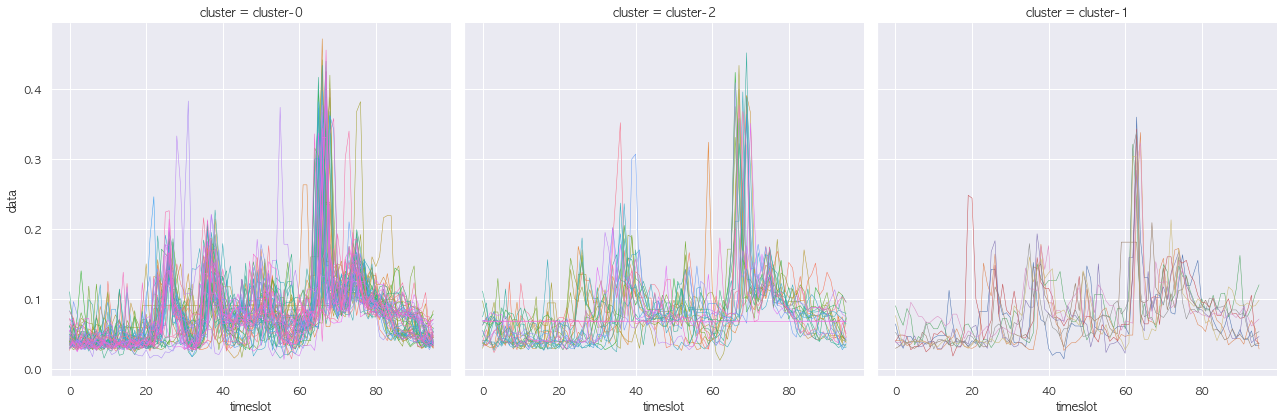

In [64]:
clusterMap = sns.FacetGrid(processingData, col="cluster",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "date",estimator=None, lw=0.5)

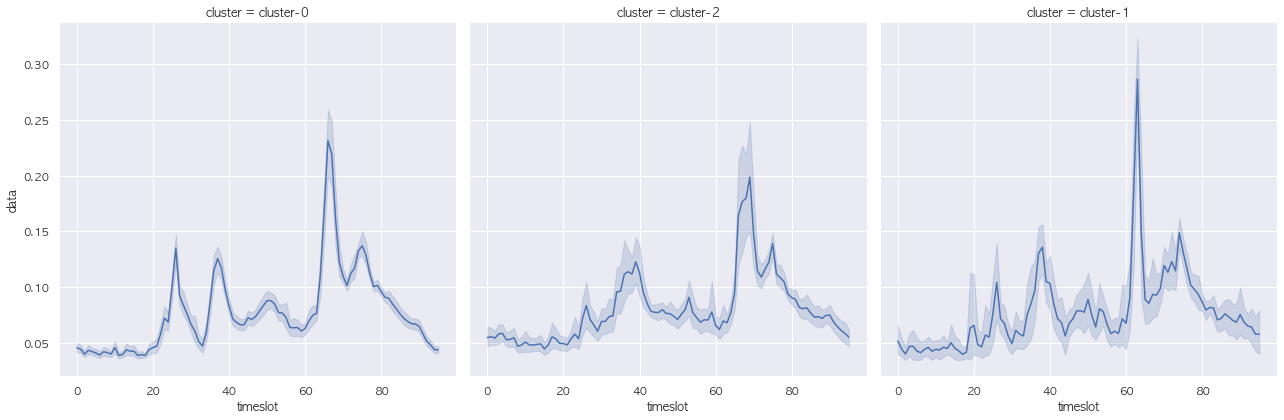

In [65]:
clusterMap = sns.FacetGrid(processingData, col = 'cluster', col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data")

In [66]:
clusters[clusters['uid'] == '아파트1-102-1501']

,uid,timeslot,season,data
0,아파트1-102-1501,0,봄,0.129478
1,아파트1-102-1501,1,봄,0.121217
2,아파트1-102-1501,2,봄,0.082826
3,아파트1-102-1501,3,봄,0.059196
4,아파트1-102-1501,4,봄,0.056717
...,...,...,...,...
91,아파트1-102-1501,91,겨울,0.173630
92,아파트1-102-1501,92,겨울,0.188167
93,아파트1-102-1501,93,겨울,0.198500
94,아파트1-102-1501,94,겨울,0.194537


In [67]:
best = pd.DataFrame(processingData.groupby('cluster').size().sort_values(ascending=False)).reset_index()['cluster'][0]
print(f'best is {best}')
cluster = processingData[processingData['cluster'] == best].groupby('timeslot').mean().reset_index()
cluster['uid'] = searchKeyword
cluster['season'] = '봄'
cluster

clusters = pd.concat([clusters, cluster], axis = 0)

best is cluster-0


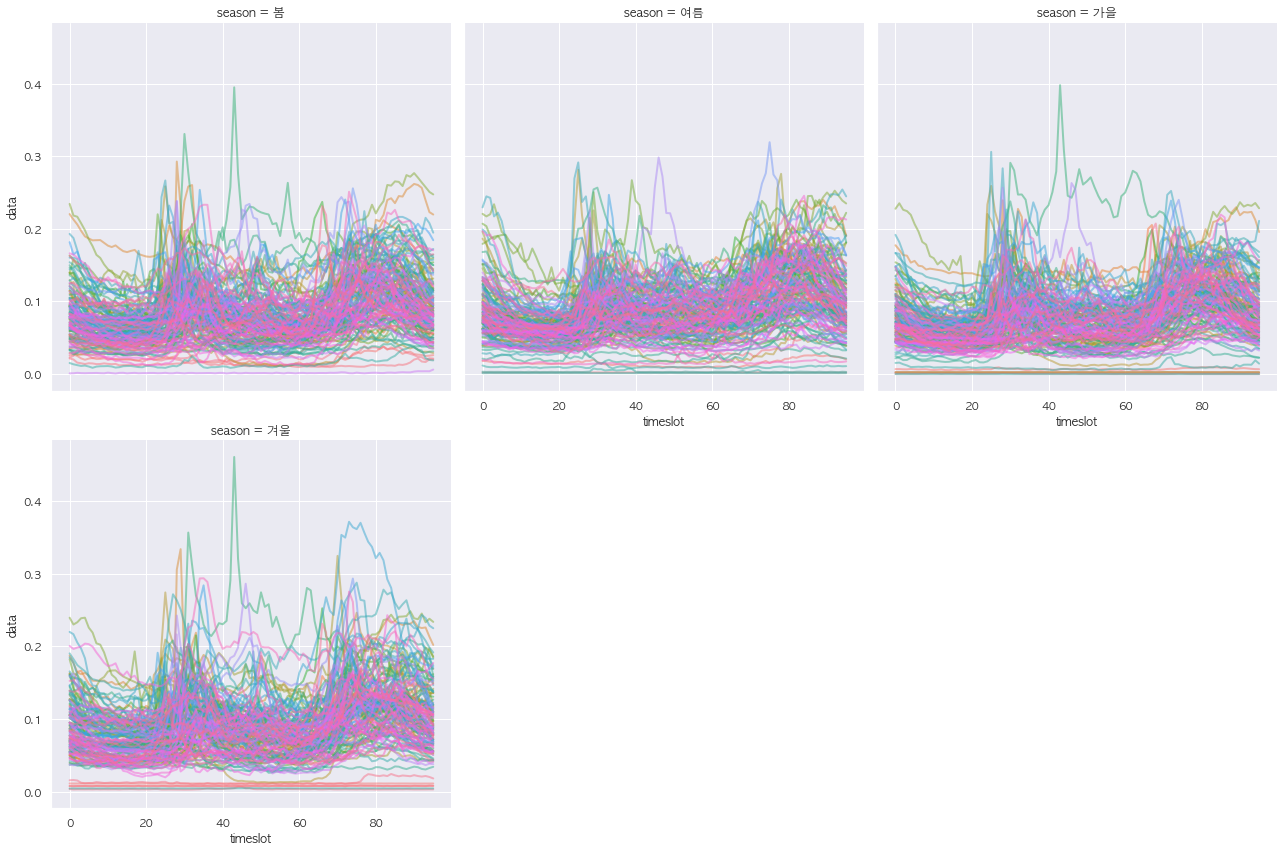

In [68]:
clusterMap = sns.FacetGrid(clusters, col="season",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "uid", estimator=None, lw=2, alpha=0.5)

In [69]:
clusters[clusters['season'] == '봄'].uid.unique()

clusters[(clusters['season'] == '봄') & (clusters['uid'] == clusters[clusters['season'] == '봄'].uid.unique()[0])].data

0     0.034154
1     0.030026
2     0.027000
3     0.026795
4     0.027974
        ...   
91    0.062410
92    0.058692
93    0.048692
94    0.046590
95    0.042615
Name: data, Length: 96, dtype: float64

<AxesSubplot:xlabel='x', ylabel='y'>

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


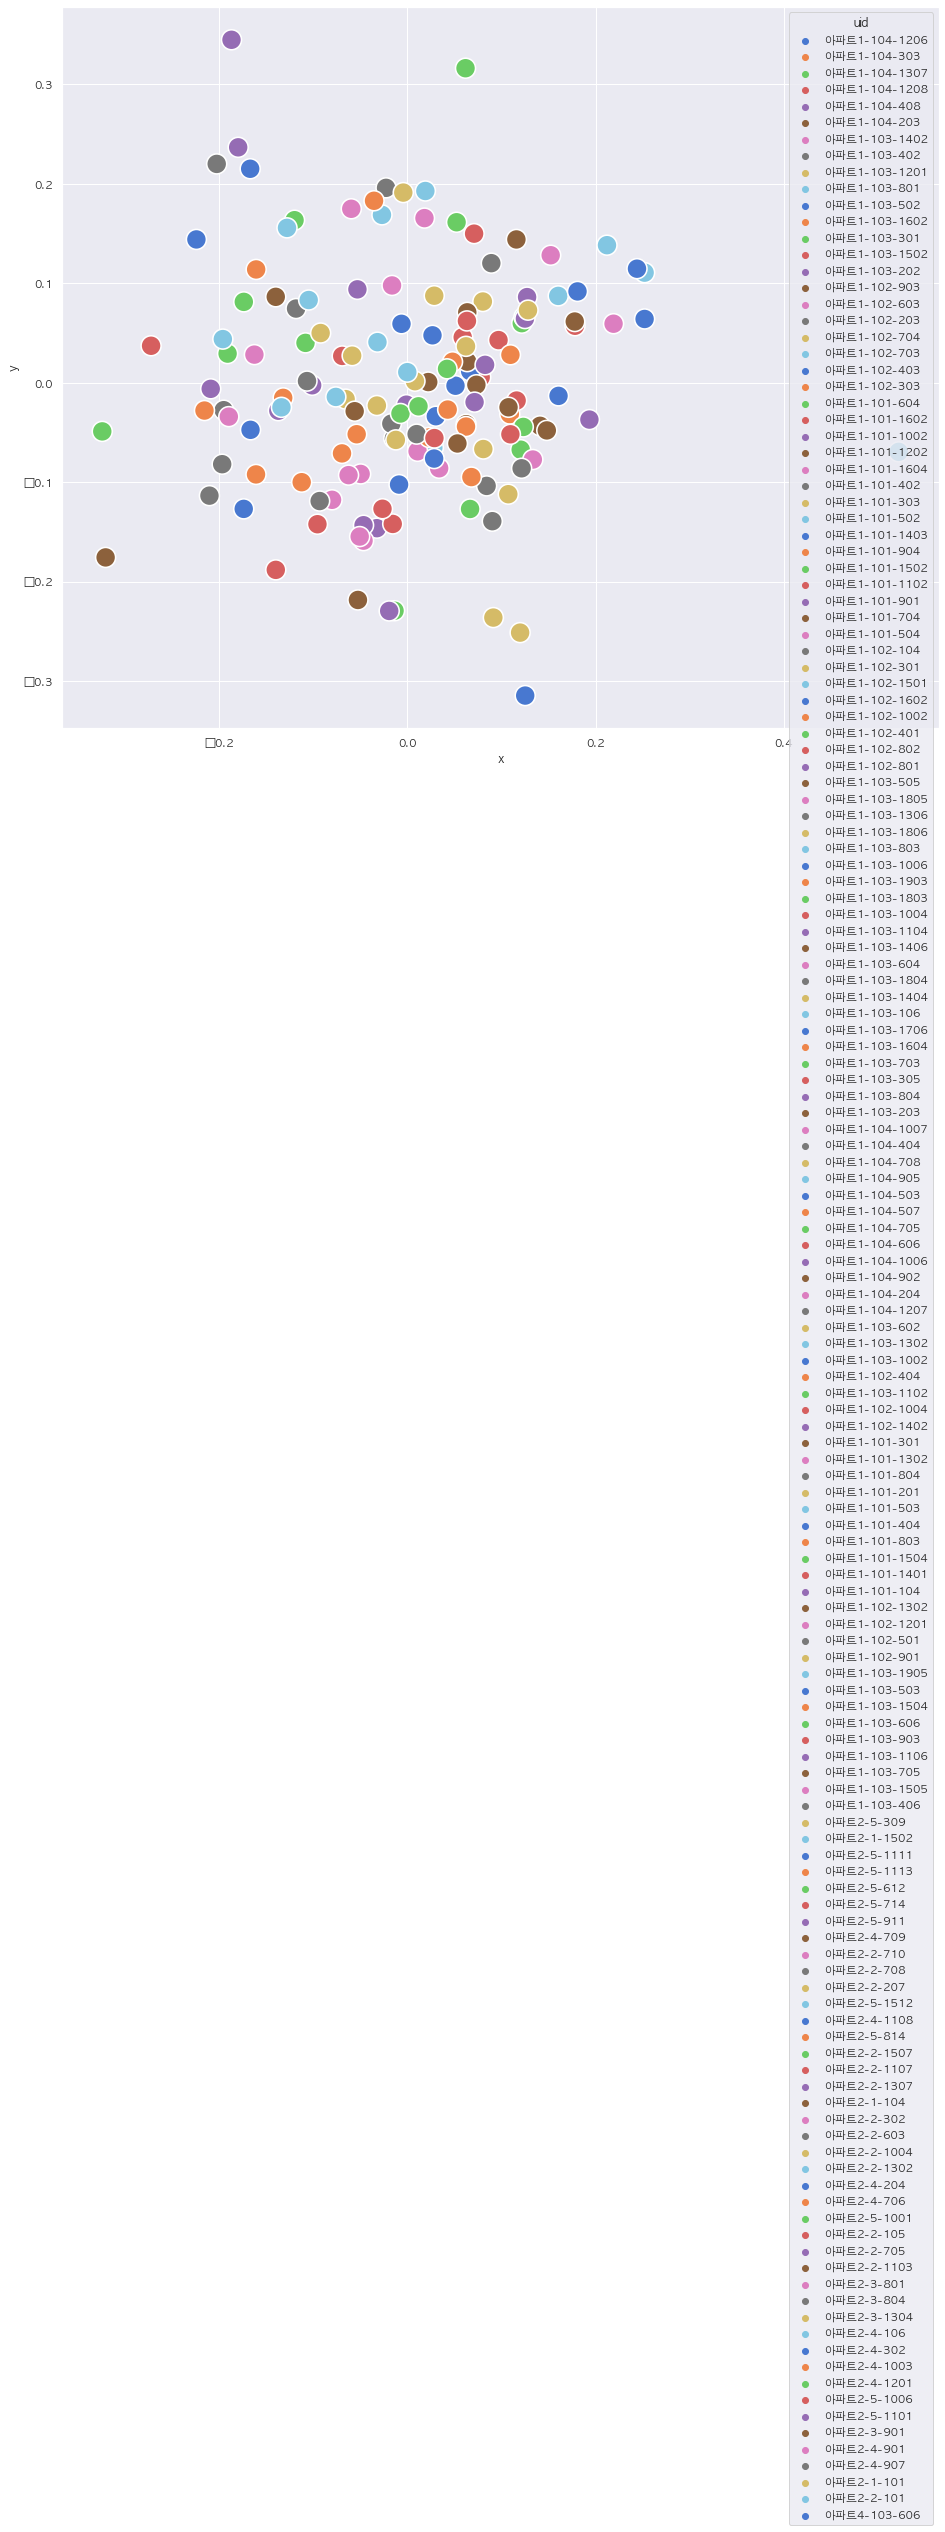

In [70]:
'''
for uid in clusters[clusters['season'] == '봄'].uid.unique():
    clusterDatas[uid] = clusters[(clusters['season'] == '봄') & (clusters['uid'] == uid)].data

clusterDatas = clusterDatas.T
clusterDatas

# Scaler 선택
# STD, MIN, MAX, ROBUST

dpp = clusterDatas.reset_index()
del dpp['index']
selScaler = "ROBUST"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = clusterDatas.index
dpp

pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = clusterDatas.index
dr.reset_index(inplace=True)
dr.rename(columns={'index': 'uid'}, inplace=True)

sns.scatterplot(x='x', y="y",  
                palette="muted",
                hue="uid",
                s=400,
                data=dr)
'''
'''
pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = datas[i]['date']
dr
'''

clusterDatas = pd.DataFrame()

for uid in clusters[clusters['season'] == '봄'].uid.unique():
    clusterDatas[uid] = clusters[(clusters['season'] == '봄') & (clusters['uid'] == uid)].data

clusterDatas = clusterDatas.T
clusterDatas

# Scaler 선택
# STD, MIN, MAX, ROBUST, NORM

dpp = clusterDatas.reset_index()
del dpp['index']
selScaler = "NORM"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()
elif selScaler == "NORM":
    scaler = Normalizer()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = clusterDatas.index
dpp

pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = clusterDatas.index
dr.reset_index(inplace=True)
dr.rename(columns={'index': 'uid'}, inplace=True)

sns.scatterplot(x='x', y="y",  
                palette="muted",
                hue="uid",
                s=400,
                data=dr)

In [17]:
ogDatas[searchKeyword]

0        0.113
1        0.112
2        0.108
3        0.108
4        0.117
         ...  
35035    0.114
35036    0.109
35037    0.104
35038    0.102
35039    0.128
Name: 아파트4-103-606, Length: 35040, dtype: float64

In [18]:
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

selectDatas = tsDatas.copy()
selectDatas

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day
0,2018-05-01,0.113,0.112,0.108,0.108,0.117,0.045,0.060,0.044,0.056,0.078,0.050,0.050,0.067,0.051,0.056,0.060,0.074,0.055,0.043,0.044,0.061,0.057,0.049,0.047,0.060,0.049,0.046,0.074,0.060,0.098,0.095,0.088,0.071,0.071,0.074,0.075,0.071,0.086,0.057,0.076,0.054,0.053,0.041,0.034,0.045,0.039,0.046,0.102,0.080,0.038,0.052,0.043,0.042,0.042,0.027,0.119,0.111,0.055,0.039,0.058,0.043,0.045,0.041,0.039,0.052,0.039,0.038,0.039,0.205,0.109,0.054,0.042,0.043,0.050,0.066,0.072,0.051,0.058,0.055,0.043,0.047,0.080,0.127,0.128,0.142,0.124,0.150,0.177,0.142,0.128,0.113,0.121,0.064,0.092,0.103,0.083,2018,05,01
1,2018-05-02,0.061,0.050,0.047,0.045,0.050,0.063,0.047,0.052,0.051,0.052,0.051,0.054,0.053,0.044,0.060,0.054,0.044,0.048,0.047,0.059,0.054,0.045,0.051,0.044,0.053,0.053,0.052,0.090,0.095,0.138,0.127,0.131,0.069,0.130,0.129,0.102,0.071,0.079,0.067,0.040,0.050,0.046,0.036,0.034,0.045,0.044,0.037,0.043,0.038,0.038,0.045,0.040,0.041,0.142,0.078,0.130,0.072,0.060,0.084,0.103,0.104,0.088,0.063,0.065,0.075,0.074,0.131,0.177,0.092,0.053,0.068,0.121,0.085,0.092,0.110,0.085,0.085,0.123,0.096,0.072,0.085,0.096,0.092,0.095,0.110,0.121,0.118,0.124,0.128,0.113,0.243,0.154,0.149,0.122,0.054,0.055,2018,05,02
2,2018-05-03,0.059,0.057,0.051,0.034,0.049,0.048,0.058,0.044,0.039,0.039,0.040,0.048,0.038,0.038,0.039,0.047,0.052,0.039,0.035,0.056,0.113,0.060,0.036,0.045,0.045,0.038,0.051,0.087,0.102,0.140,0.089,0.084,0.076,0.089,0.044,0.037,0.044,0.049,0.047,0.041,0.042,0.042,0.041,0.067,0.062,0.095,0.121,0.080,0.065,0.067,0.075,0.075,0.079,0.063,0.054,0.073,0.080,0.038,0.039,0.044,0.048,0.048,0.062,0.057,0.036,0.038,0.045,0.117,0.121,0.239,0.090,0.102,0.093,0.115,0.105,0.133,0.129,0.161,0.090,0.093,0.090,0.146,0.111,0.095,0.096,0.092,0.162,0.177,0.122,0.135,0.194,0.182,0.174,0.144,0.123,0.071,2018,05,03
3,2018-05-04,0.071,0.065,0.061,0.055,0.056,0.073,0.065,0.067,0.067,0.081,0.057,0.057,0.045,0.057,0.055,0.047,0.049,0.057,0.048,0.049,0.049,0.054,0.046,0.049,0.050,0.054,0.053,0.086,0.109,0.113,0.097,0.083,0.044,0.039,0.045,0.048,0.047,0.044,0.033,0.046,0.040,0.046,0.038,0.046,0.039,0.061,0.070,0.081,0.100,0.094,0.119,0.102,0.091,0.095,0.068,0.067,0.087,0.105,0.059,0.035,0.039,0.040,0.045,0.030,0.044,0.038,0.054,0.041,0.202,0.112,0.042,0.059,0.050,0.040,0.044,0.075,0.052,0.049,0.062,0.055,0.064,0.056,0.042,0.047,0.050,0.085,0.092,0.086,0.136,0.126,0.233,0.193,0.117,0.225,0.089,0.113,2018,05,04
4,2018-05-05,0.098,0.059,0.049,0.052,0.093,0.059,0.055,0.062,0.057,0.061,0.060,0.036,0.095,0.107,0.051,0.053,0.061,0.049,0.049,0.048,0.062,0.046,0.043,0.048,0.044,0.063,0.052,0.045,0.047,0.046,0.059,0.049,0.034,0.051,0.048,0.063,0.053,0.044,0.045,0.044,0.059,0.109,0.085,0.090,0.077,0.075,0.084,0.059,0.092,0.090,0.106,0.191,0.264,0.109,0.098,0.122,0.106,0.088,0.076,0.077,0.116,0.116,0.149,0.058,0.074,0.082,0.078,0.086,0.085,0.088,0.092,0.088,0.082,0.076,0.087,0.094,0.150,0.215,0.317,0.266,0.143,0.141,0.156,0.128,0.135,0.119,0.142,0.181,0.115,0.126,0.120,0.153,0.121,0.110,0.113,0.087,2018,05,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-04-26,0.043,0.047,0.036,0.045,0.026,0.033,0.049,0.052,0.036,0.036,0.034,0.046,0.040,0.034,0.045,0.039,0.048,0.038,0.037,0.036,0.032,0.054,0.030,0.174,0.128,0.047,0.057,0.037,0.082,0.153,0.115,0.112,0.090,0.089,0.067,0.050,0.063,0.053,0.051,0.052,0.053,0.061,0.050,0.047,0.045,0.044,0.064,

In [19]:
selectDatas = [
    selectDatas[(selectDatas['month'].isin(SEASONS[season]))].copy()
    for season in ["봄", "여름", "가을", "겨울"]
]
selectDatas

[          date      0      1      2      3      4      5      6      7      8  \
 0   2018-05-01  0.113  0.112  0.108  0.108  0.117  0.045  0.060  0.044  0.056   
 1   2018-05-02  0.061  0.050  0.047  0.045  0.050  0.063  0.047  0.052  0.051   
 2   2018-05-03  0.059  0.057  0.051  0.034  0.049  0.048  0.058  0.044  0.039   
 3   2018-05-04  0.071  0.065  0.061  0.055  0.056  0.073  0.065  0.067  0.067   
 4   2018-05-05  0.098  0.059  0.049  0.052  0.093  0.059  0.055  0.062  0.057   
 ..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 360 2019-04-26  0.043  0.047  0.036  0.045  0.026  0.033  0.049  0.052  0.036   
 361 2019-04-27  0.051  0.053  0.055  0.052  0.046  0.049  0.066  0.051  0.051   
 362 2019-04-28  0.048  0.055  0.060  0.069  0.057  0.044  0.056  0.082  0.077   
 363 2019-04-29  0.087  0.089  0.057  0.068  0.046  0.047  0.049  0.045  0.060   
 364 2019-04-30  0.086  0.087  0.145  0.081  0.089  0.058  0.038  0.041  0.051   
 
          9   

In [20]:
selectClusters = pd.DataFrame()
for i in range(0,4):
        dpp = selectDatas[i][selectDatas[i].columns.difference(['date', 'year', 'month', 'day'])].copy()
        dpp = dpp

        # Scaler 선택
        # STD, MIN, MAX, ROBUST
        selScaler = "ROBUST"

        scaler = StandardScaler()
        if selScaler == "STD":
            scaler = StandardScaler()
        elif selScaler == "MIN":
            scaler = MinMaxScaler()
        elif selScaler == "MAX":
            scaler = MaxAbsScaler()
        elif selScaler == "ROBUST":
            scaler = RobustScaler()

        dpp = pd.DataFrame(scaler.fit_transform(dpp))

        dpp.index = selectDatas[i]['date']
        dpp

        pca = PCA(n_components=2)

        pca.fit(dpp)
        dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

        dr.index = selectDatas[i]['date']
        dr

        '''
        def elbow(X):
            sse = []
            for i in range(1, 11):
                km = KMeans(n_clusters=i, init='k-means++', random_state=0)
                km.fit(X)
                sse.append(km.inertia_)

            plt.plot(range(1, 11), sse, marker = 'o')
            plt.show()

        elbow(dr)
        '''

        K = 3

        points = dr.values
        kmeans = KMeans(n_clusters=K).fit(points)
        centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

        clusterNum = [i for i in range(K)]
        centers['cluster'] = [i for i in range(len(centers))]
        centers['type'] = [f'cluster' for dt in clusterNum]
        centers

        kmeans.labels_

        clustering = dr.copy()
        clustering['cluster'] = kmeans.labels_
        clustering['type'] = ['data' for i in range(len(clustering['x']))]

        result = pd.concat([clustering, centers], axis = 0)

        result

        '''
        sns.scatterplot(x='x', y="y", 
                        hue="cluster", 
                        style="type",
                        palette="muted",
                        s=400,
                        data=result)
        '''
        tsCheck = selectDatas[i][selectDatas[i].columns.difference(['year', 'month', 'day'])].copy()
        tsCheck.reset_index(inplace=True)
        del tsCheck['index']
        tsCheck = tsCheck.set_index('date')
        tsCheck['cluster'] = clustering['cluster']
        tsCheck.reset_index(inplace=True)
        tsCheck.set_index(['cluster', 'date'], inplace=True)
        tsCheck = tsCheck.T
        tsCheck
        '''
        sns.lineplot(data=tsCheck)
        '''

        processingData = [];
        for d in tsCheck:
            for idx,t in enumerate(tsCheck[d]):
                processingData.append({
                    "date": d[1],
                    "timeslot": idx,
                    "cluster": f"cluster-{d[0]}",
                    "data": t
                })
        processingData = pd.DataFrame(processingData)
        processingData

        '''
        sns.lineplot(data=processingData,
                    x="timeslot",
                    y="data",
                    units="date",
                    hue="cluster",
                    estimator=None,
                    lw=0.5)
        '''

        best = pd.DataFrame(processingData.groupby('cluster').size().sort_values(ascending=False)).reset_index()['cluster'][0]
#        print(f'best is {best}')
        cluster = processingData[processingData['cluster'] == best].groupby('timeslot').mean().reset_index()
        cluster['uid'] = searchKeyword
        cluster['season'] = SEASONSARR[i]
        cluster

        selectClusters = pd.concat([selectClusters, cluster], axis = 0)
    
selectClusters[selectClusters['season'] == '봄']
copy = selectClusters[selectClusters['season'] == '봄'].copy()
copy

# clusterDatas[searchKeyword] = clusterDatas.T[searchKeyword]copy['data']
# clusterDatas = clusterDatas.T
# del clusterDatas[searchKeyword]
# clusterDatas


clusterDatas = clusterDatas.T
clusterDatas[searchKeyword] = copy['data']
clusterDatas = clusterDatas.T
clusterDatas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
아파트1-104-1206,0.034154,0.030026,0.027000,0.026795,0.027974,0.025359,0.021692,0.023333,0.022410,0.023615,0.021641,0.020462,0.020128,0.020256,0.020282,0.020897,0.020462,0.018821,0.018359,0.016923,0.018897,0.020949,0.020205,0.018923,0.018641,0.020282,0.020897,0.021282,0.019923,0.019051,0.015923,0.017077,0.018846,0.018487,0.017282,0.016821,0.017128,0.017795,0.019000,0.019051,0.017359,0.016615,0.020103,0.017308,0.018026,0.020436,0.020590,0.021308,0.020846,0.020256,0.022359,0.024179,0.022282,0.021462,0.019821,0.020744,0.024359,0.025615,0.025077,0.022795,0.020205,0.020615,0.024872,0.027154,0.024667,0.021538,0.020744,0.023872,0.027051,0.030154,0.027103,0.029154,0.029744,0.035538,0.042205,0.040026,0.051923,0.060615,0.054000,0.063026,0.069795,0.061308,0.061103,0.064308,0.066641,0.065949,0.065000,0.063333,0.062333,0.062436,0.061667,0.062410,0.058692,0.048692,0.046590,0.042615
아파트1-104-303,0.022827,0.025038,0.032135,0.030538,0.034423,0.040096,0.040327,0.039519,0.036423,0.034365,0.033788,0.030308,0.028788,0.028000,0.026250,0.026962,0.026962,0.026135,0.025981,0.026346,0.026865,0.023731,0.022942,0.023308,0.022885,0.021615,0.022058,0.021769,0.022481,0.021481,0.021750,0.022423,0.025846,0.025173,0.033327,0.037692,0.041865,0.042635,0.029981,0.019712,0.018654,0.017019,0.015212,0.012135,0.012327,0.011500,0.013231,0.012404,0.011654,0.011615,0.011923,0.010788,0.010981,0.011654,0.011269,0.010942,0.011077,0.011635,0.011596,0.012596,0.013192,0.013769,0.011962,0.012327,0.012096,0.012019,0.010962,0.010615,0.011904,0.012058,0.016692,0.024135,0.021788,0.022327,0.026077,0.028327,0.032577,0.038981,0.034365,0.036788,0.036788,0.034250,0.037712,0.034519,0.034462,0.035615,0.037308,0.033596,0.029442,0.027827,0.026212,0.023615,0.023288,0.019865,0.021712,0.021365
아파트1-104-1307,0.021507,0.020067,0.015707,0.014867,0.013773,0.014880,0.014600,0.013693,0.013853,0.014720,0.014027,0.013560,0.013960,0.011973,0.012293,0.012507,0.012867,0.012440,0.011587,0.013133,0.012000,0.012387,0.013440,0.014800,0.013053,0.013040,0.013440,0.013987,0.014480,0.014493,0.015227,0.015360,0.014547,0.016000,0.016573,0.015493,0.013653,0.012373,0.013347,0.012360,0.014147,0.013320,0.013947,0.012093,0.013400,0.012787,0.011027,0.010600,0.012040,0.013173,0.013413,0.012627,0.011280,0.011893,0.011320,0.011387,0.011267,0.012600,0.010720,0.010000,0.009547,0.010440,0.010680,0.010200,0.010213,0.009867,0.010280,0.010107,0.009560,0.010387,0.010920,0.011347,0.010747,0.011013,0.010707,0.010253,0.010067,0.010160,0.011467,0.012787,0.012067,0.012093,0.012333,0.011733,0.011880,0.011360,0.013053,0.012573,0.013707,0.015973,0.019987,0.021427,0.017253,0.016547,0.020200,0.019973
아파트1-104-1208,0.044622,0.039649,0.034811,0.035162,0.034919,0.034270,0.035378,0.034378,0.036919,0.039541,0.034946,0.033568,0.032676,0.032622,0.035811,0.039865,0.041216,0.044135,0.042162,0.049649,0.051703,0.058568,0.056892,0.054865,0.057027,0.054514,0.052703,0.057135,0.058703,0.057676,0.054378,0.057297,0.054649,0.051703,0.046405,0.042162,0.043000,0.039162,0.037081,0.038027,0.033054,0.031189,0.033162,0.029703,0.028405,0.028270,0.027486,0.026595,0.028649,0.028838,0.026595,0.026378,0.027351,0.029568,0.029162,0.026919,0.028784,0.031946,0.029568,0.029162,0.027919,0.032973,0.034432,0.034676,0.035351,0.038432,0.045649,0.049459,0.056946,0.056541,0.054243,0.054622,0.056486,0.059919,0.064324,0.068595,0.065189,0.066432,0.067649,0.067514,0.065946,0.067081,0.074514,0.073946,0.067027,0.060649,0.057838,0.054027,0.056000,0.053027,0.051541,0.051649,0.050649,0.049243,0.049865,0.049730
아파트1-104-408,0.024674,0.025884,0.024140,0.021419,0.019721,0.021070,0.021907,0.020605,0.020837,0.021465,0.019837,0.020628,0.020674,0.019977,0.019953,0.019884,0.019930,0.019093,0.018535,0.020860,0.020070,0.021326

In [21]:
dpp = clusterDatas.reset_index()
del dpp['index']
selScaler = "ROBUST"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = clusterDatas.index
dpp

pca = PCA(n_components=2)


pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = clusterDatas.index
dr.reset_index(inplace=True)
dr.rename(columns={'index': 'uid'}, inplace=True)

dr['type'] = 'old'
valueChanger = dr[dr['uid'] == searchKeyword].copy();

valueChanger['type'] = 'new'
dr = pd.concat([dr[dr['uid'] != searchKeyword].copy(), valueChanger], axis=0)
dr

,uid,x,y,type
0,아파트1-104-1206,11.964928,-0.655237,old
1,아파트1-104-303,13.048179,-1.099218,old
2,아파트1-104-1307,15.395330,0.132407,old
3,아파트1-104-1208,8.422346,-0.770209,old
4,아파트1-104-408,13.723921,-0.465616,old
...,...,...,...,...
146,아파트2-4-901,-2.991252,-2.523281,old
147,아파트2-4-907,-11.655002,-4.565419,old
148,아파트2-1-101,-0.486518,0.192759,old
149,아파트2-2-101,1.923615,4.200687,old


<AxesSubplot:xlabel='x', ylabel='y'>

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


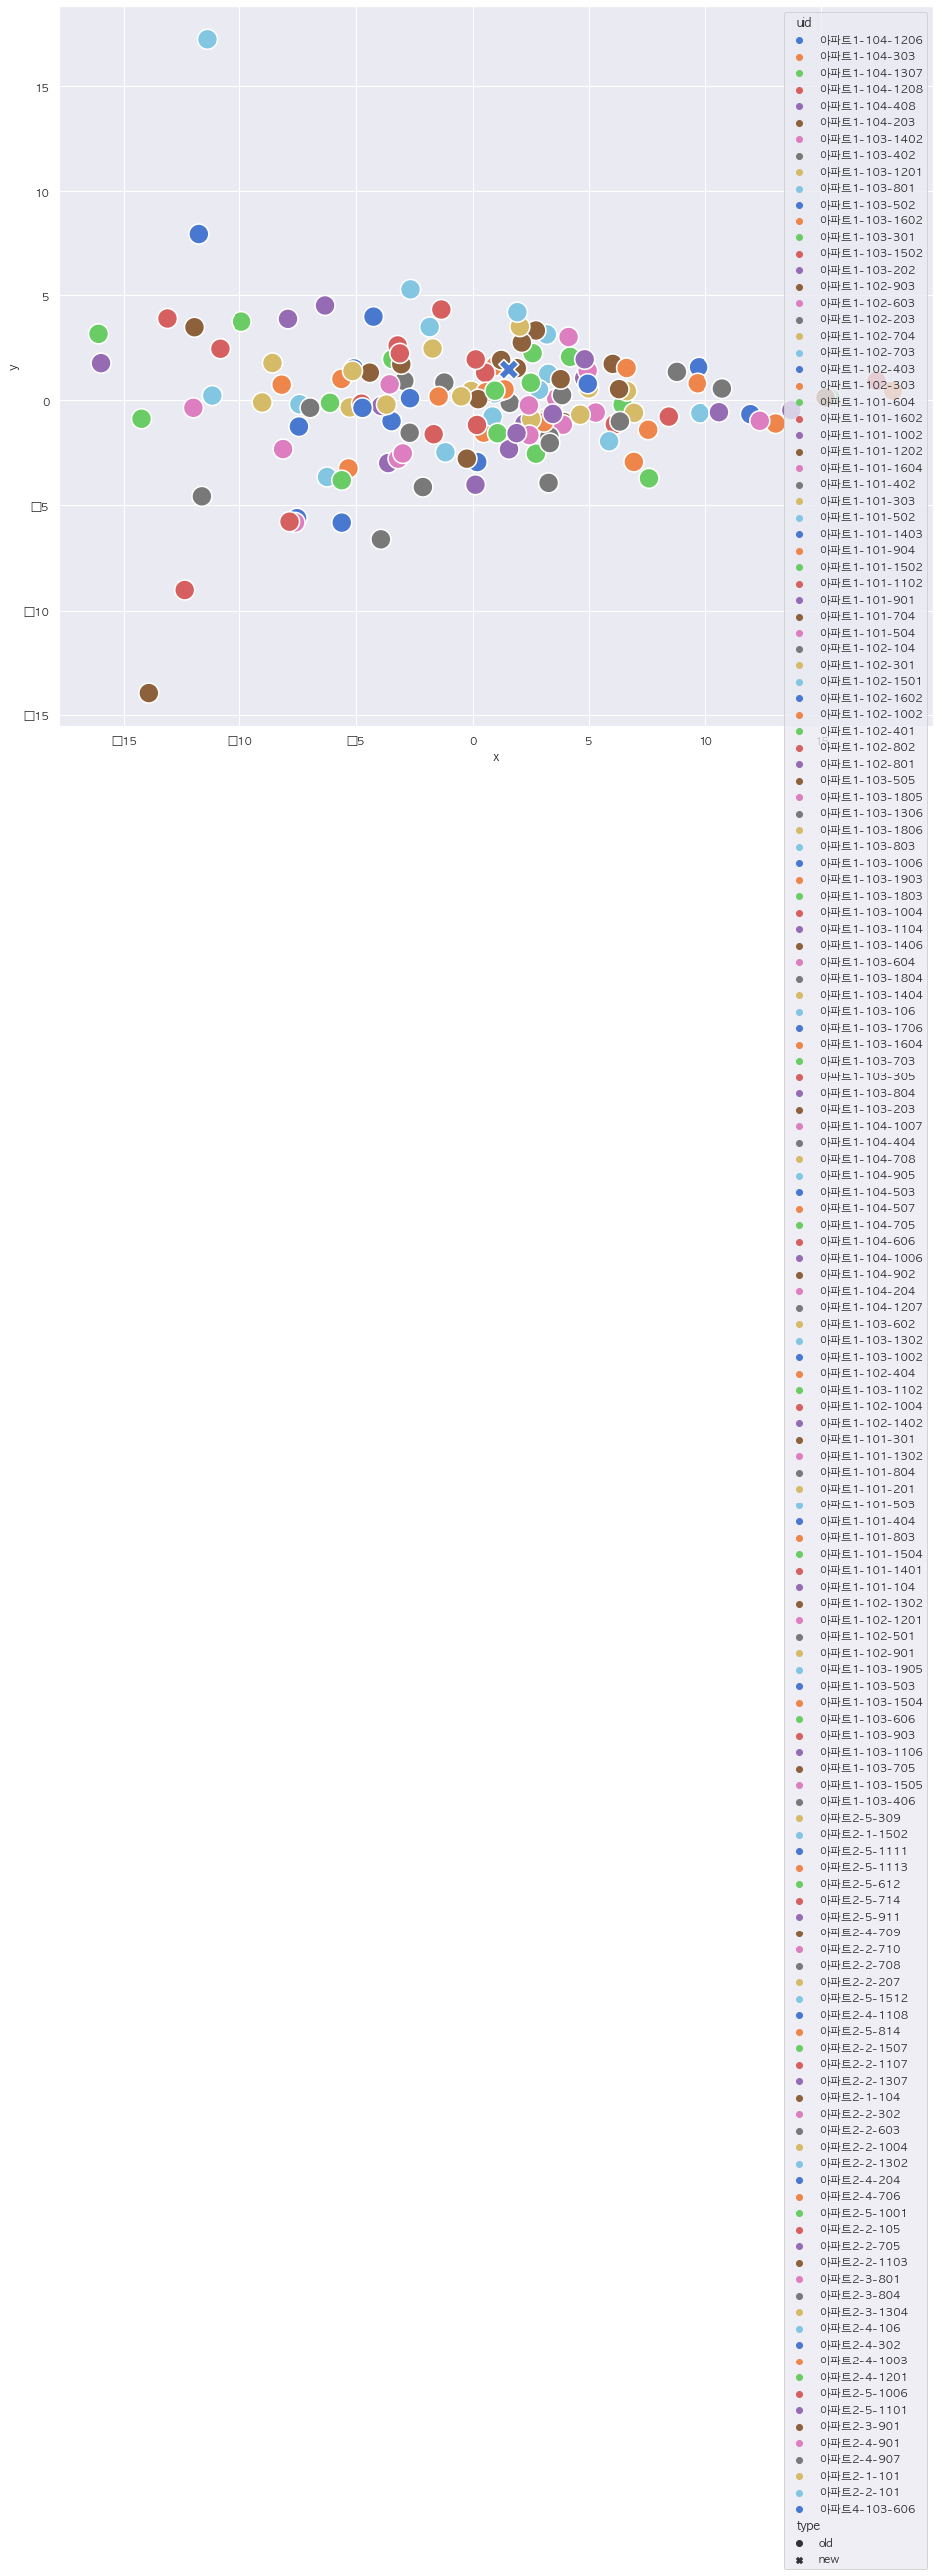

In [22]:
sns.scatterplot(x='x', y="y",  
                palette="muted",
                hue="uid",
                style="type",
                s=400,
                data=dr)

In [23]:
from scipy.spatial import distance

In [24]:
copyDr = dr.copy()

arr = [dr[dr['type'] == 'new']['x'],dr[dr['type'] == 'new']['y']]
arr

copyDr.set_index('uid', inplace=True)
copyDr = copyDr[copyDr['type'] != 'new']
del copyDr['type']
copyDr = copyDr.T
copyDr

checkFrame = pd.DataFrame();
for uid in copyDr:
    check = [copyDr[uid]['x'], copyDr[uid]['y']]
    dis = distance.euclidean(arr,check);
    
    checkFrame[uid] = pd.Series(dis)

checkFrame = checkFrame.T
checkFrame.sort_values([0], inplace=True)
checkFrame
bestCheck = checkFrame.index[0]
bestCheck

secondCheck = checkFrame.index[1]
secondCheck

'아파트1-103-705'

In [25]:
bestDf = pd.DataFrame(clusterDatas.T[bestCheck])
bestDf.reset_index(inplace=True)
bestDf.rename(columns = {"index": "timeslot", bestCheck: "data"}, inplace=True)
bestDf['uid'] = bestCheck
bestDf

,timeslot,data,uid
0,0,0.068273,아파트1-101-704
1,1,0.065000,아파트1-101-704
2,2,0.060136,아파트1-101-704
3,3,0.057568,아파트1-101-704
4,4,0.049818,아파트1-101-704
...,...,...,...
91,91,0.094727,아파트1-101-704
92,92,0.089182,아파트1-101-704
93,93,0.092205,아파트1-101-704
94,94,0.091295,아파트1-101-704


In [26]:
secondDf = pd.DataFrame(clusterDatas.T[secondCheck])
secondDf.reset_index(inplace=True)
secondDf.rename(columns = {"index": "timeslot", secondCheck: "data"}, inplace=True)
secondDf['uid'] = secondCheck
secondDf

,timeslot,data,uid
0,0,0.063413,아파트1-103-705
1,1,0.063761,아파트1-103-705
2,2,0.061522,아파트1-103-705
3,3,0.061000,아파트1-103-705
4,4,0.061196,아파트1-103-705
...,...,...,...
91,91,0.070978,아파트1-103-705
92,92,0.065804,아파트1-103-705
93,93,0.069000,아파트1-103-705
94,94,0.063478,아파트1-103-705


In [27]:
selec = pd.DataFrame(clusterDatas.T[searchKeyword])
selec.reset_index(inplace=True)
selec.rename(columns = {"index": "timeslot", searchKeyword: "data"}, inplace=True)
selec['uid'] = searchKeyword
selec

,timeslot,data,uid
0,0,0.065917,아파트4-103-606
1,1,0.062708,아파트4-103-606
2,2,0.058903,아파트4-103-606
3,3,0.056972,아파트4-103-606
4,4,0.054875,아파트4-103-606
...,...,...,...
91,91,0.096958,아파트4-103-606
92,92,0.089611,아파트4-103-606
93,93,0.082792,아파트4-103-606
94,94,0.071764,아파트4-103-606


In [28]:
allCheck = pd.concat([bestDf, secondDf,selec], axis=0)
allCheck

,timeslot,data,uid
0,0,0.068273,아파트1-101-704
1,1,0.065000,아파트1-101-704
2,2,0.060136,아파트1-101-704
3,3,0.057568,아파트1-101-704
4,4,0.049818,아파트1-101-704
...,...,...,...
91,91,0.096958,아파트4-103-606
92,92,0.089611,아파트4-103-606
93,93,0.082792,아파트4-103-606
94,94,0.071764,아파트4-103-606


<AxesSubplot:xlabel='timeslot', ylabel='data'>

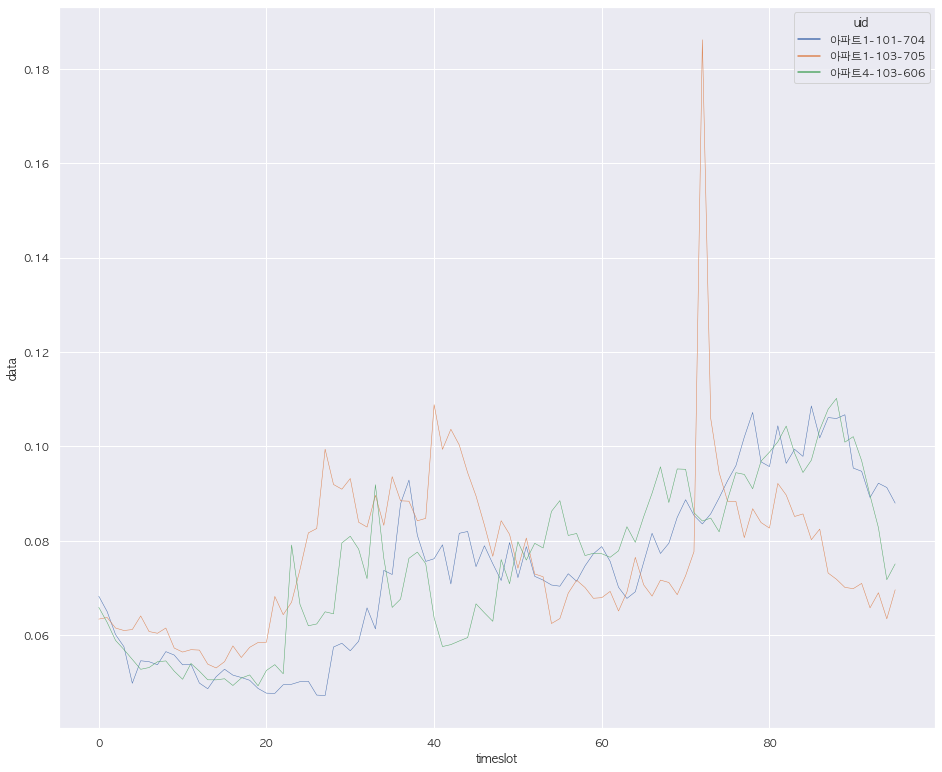

In [29]:
sns.lineplot(data=allCheck,
            x="timeslot",
            y="data",
            hue="uid",
            estimator=None,
            lw=0.5)

In [55]:
distDf = []
for uid in allCheck['uid'].unique():
    distDf.append(pd.DataFrame(ogDatas[uid]))
    distDf[len(distDf) - 1]['uid'] = uid
    distDf[len(distDf) - 1].rename(columns={uid: "data"}, inplace=True)
    
distDf = pd.concat(distDf)

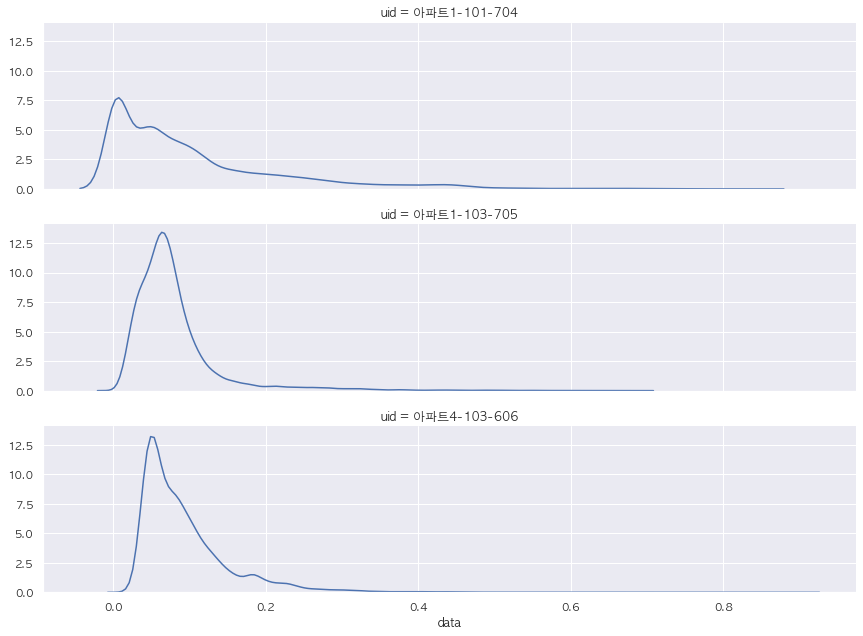

In [56]:
distribute = sns.FacetGrid(distDf, row="uid", aspect=4)
distribute.map(sns.kdeplot, "data")

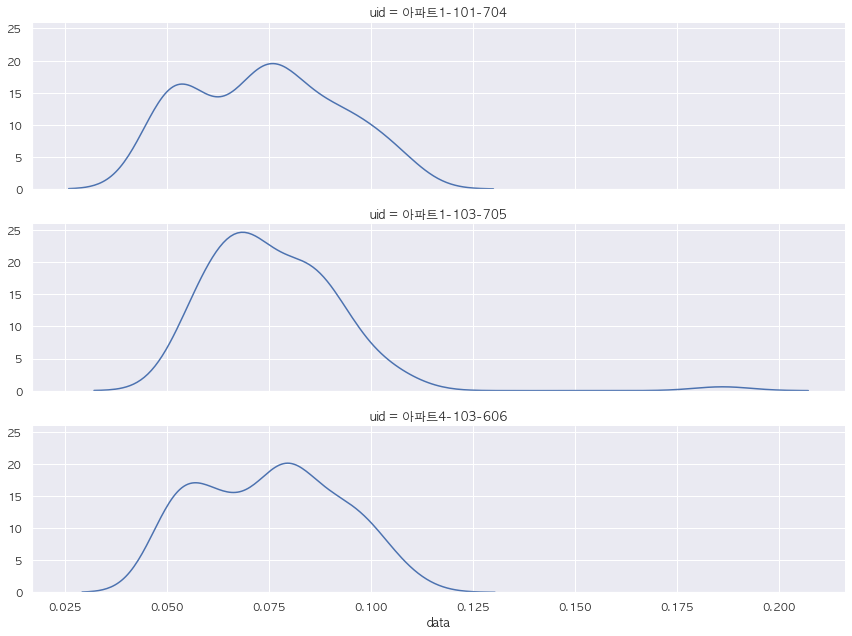

In [57]:
distribute = sns.FacetGrid(allCheck, row="uid", aspect=4)
distribute.map(sns.kdeplot, "data")